In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm

import pandas as pd
import numpy as np

from time import time, clock
import itertools
import re

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.lda import LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
 
%matplotlib inline

C:\Program Files\Python 3.4\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


## Data loading and preprocessing

In [3]:
train = pd.read_csv("data/train.csv")
print(train.shape)

#Reformattons la colonne target pour avoir des entiers
train.target = train.target.str.replace('Class_','').astype(int)
train.head()

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [4]:
X = train.drop(['id','target'],axis = 1)
y = train.target

In [5]:
X_off_test = pd.read_csv("data/test.csv")
print(X_off_test.shape)
X_off_test.head()

(144368, 94)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [6]:
submit = pd.read_csv("data/sampleSubmission.csv")
print(submit.shape)
submit.head()

(144368, 10)


,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


# Crossval

In [7]:
#split our dataset into train/validation/test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
nsplits = 5
kfold = KFold(n_splits = nsplits,random_state = 42)

## The baseline

In [18]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_probas = tree.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 9.8850


## Classifiers comparison

In [19]:
RF = RandomForestClassifier(n_jobs=-1)
RF.fit(X_train,y_train)

y_probas = RF.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 1.5064


In [20]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_probas = xgb.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.6483


In [21]:
ada = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state = 42)
ada.fit(X_train,y_train)

y_probas = ada.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 2.1180


In [22]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)

y_probas = mlp.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.6576


In [23]:
lda = LDA()
lda.fit(X_train,y_train)

y_probas = lda.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.9215


In [24]:
naive = GaussianNB()
naive.fit(X_train,y_train)

y_probas = naive.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 7.2519


In [25]:
sgd = SGDClassifier(loss = 'log')
sgd.fit(X_train,y_train)

y_probas = sgd.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 2.4429


C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [26]:
boost = GradientBoostingClassifier(random_state = 42)
boost.fit(X_train,y_train)

y_probas = boost.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.5996


## Some HP search

In [ ]:
""" AdaBoost Classifier """

ada_param_grid = {'n_estimators': [50, 100, 150, 300, 600],
                  'learning_rate': [0.1, 0.2, 0.5, 1., 1.5],
                 }

ada_grid_search = GridSearchCV(estimator = AdaBoostClassifier(random_state=42),
                               param_grid = ada_param_grid,
                               cv=5, n_jobs=-1,
                               verbose = 1,
                               scoring = 'neg_log_loss')
start = time()
ada_grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(ada_grid_search.grid_scores_)))
print(ada_grid_search.best_params_)

"""Prediction with those best parameters"""

best_ada_clf = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state=42)
best_ada_clf.fit(X_train, y_train)

y_pred = best_ada_clf.predict(X_test)
y_probas = best_ada_clf.predict_proba(X_test)
print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 10.9min finished


GridSearchCV took 657.55 seconds for 25 candidate parameter settings.
{'learning_rate': 0.1, 'n_estimators': 50}
Mean log_loss : 2.1180


In [ ]:
""" Gradient Boosting Classifier """

gbc_param_grid = {'n_estimators': [100, 300, 600],
                  'learning_rate': [0.1, 0.2, 0.5, 1.],
                 }

gbc_grid_search = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42),
                               param_grid = gbc_param_grid,
                               cv=5, n_jobs=-1,
                               verbose = 1,
                               scoring = 'neg_log_loss')
start = time()
gbc_grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gbc_grid_search.grid_scores_)))
print(gbc_grid_search.best_params_)

best_gbc_clf = gbc_grid_search.best_estimator_
best_gbc_clf.fit(X_train, y_train)

y_pred = best_gbc_clf.predict(X_test)
y_probas = best_gbc_clf.predict_proba(X_test)
print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
""" Multi-Layer Perceptron Classifier """
nn_param_grid = { 
    'alpha': [0.0001, 0.001, 0.1, 1],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'solver': ['lbfgs', 'adam'],
    'activation': ['relu', 'tanh', 'logistic']
    }

nn_grid_search = GridSearchCV(estimator = MLPClassifier(random_state = 42),
                              param_grid = nn_param_grid,
                              cv = 5, n_jobs = -1,
                              verbose = 1,
                              scoring = 'neg_log_loss')
start = time()
nn_grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(nn_grid_search.grid_scores_)))
print(nn_grid_search.best_params_)

best_nn = nn_grid_search.best_estimator_
best_nn.fit(X_train, y_train)

y_pred = best_nn.predict(X_test)
y_probas = best_nn.predict_proba(X_test)
print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

In [ ]:
""" Random Forest Classifier """

rf_param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600],
                  'criterion': ['gini','entropy'],
                  'max_depth': [1,2,5,10,20]
                 }

rf_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                              param_grid = rf_param_grid,
                              cv=5, n_jobs=-1,
                              verbose = 1,
                              scoring = 'neg_log_loss')
start = time()
rf_grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid_search.grid_scores_)))
print(rf_grid_search.best_params_)

best_rf_clf = rf_grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred = best_rf_clf.predict(X_test)
y_probas = best_rf_clf.predict_proba(X_test)
print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

## Dimensionality reduction

For 1 components
mean logloss: 11.624
For 2 components
mean logloss: 2.839
For 3 components
mean logloss: 1.649
For 4 components
mean logloss: 1.388
For 5 components
mean logloss: 1.094
For 6 components
mean logloss: 0.947
For 7 components
mean logloss: 0.912
For 8 components
mean logloss: 0.835
For 9 components
mean logloss: 0.801
For 10 components
mean logloss: 0.796
For 11 components
mean logloss: 0.753
For 12 components
mean logloss: 0.718
For 13 components
mean logloss: 0.712
For 14 components
mean logloss: 0.700
For 15 components
mean logloss: 0.674
For 16 components
mean logloss: 0.676
For 17 components
mean logloss: 0.650
For 18 components
mean logloss: 0.667
For 19 components
mean logloss: 0.658
Computation time: 1437.77s


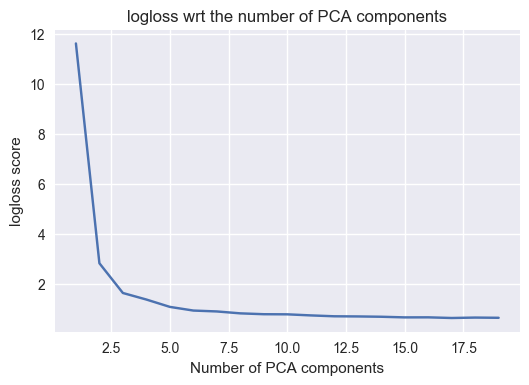

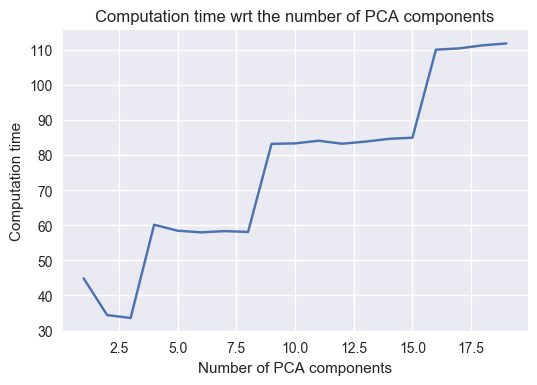

In [10]:
# Optimisation du nombre de composantes dans la PCA
tps = clock()
scores = []
times = []
model = RandomForestClassifier(n_estimators=150, criterion ='entropy')
max_comp = 20
for n_comp in range(1,max_comp):
    tps2 = clock()
    pca = PCA(n_components=n_comp)
    
    Xtr_new = pca.fit_transform(X_train,y_train)
    model.fit(Xtr_new,y_train)
    
    Xte_new = pca.transform(X_test)
    y_probas = model.predict_proba(Xte_new)
    score = log_loss(y_test,y_probas)
    
    scores.append(score)
    times.append(clock()-tps2)
    print("For %i components"%n_comp)
    print("mean logloss: %.3f"%score)

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(1,max_comp),scores)
plt.title("logloss wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("logloss score")
plt.figure()
plt.plot(np.arange(1,max_comp),times)
plt.title("Computation time wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("Computation time")

# Overfitting

In [ ]:
# Check overfitting avec le max_depth
tps = clock()
accuracies = []
max_depth = 50

tr_scores = []
te_scores = []

for depth in range(1,max_depth):
    print(depth)
    model = RandomForestClassifier(n_estimators=150, criterion ='entropy', max_depth = depth)
    model.fit(X_train,y_train)
    
    train_probas = model.predict_proba(X_train)[:,1]
    test_probas = model.predict_proba(X_test)[:,1]
    tr_score = roc_auc_score(y_train,train_probas)
    te_score = roc_auc_score(y_test,test_probas)
    tr_scores.append(tr_score)
    te_scores.append(te_score)

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(1,max_depth),tr_scores,c = 'b',label = "Train")
plt.plot(np.arange(1,max_depth),te_scores,c = 'r',label = "Test")
plt.legend()
plt.title("AUC on train and test sets wrt the depth of the trees")
plt.xlabel("max depth")
plt.ylabel("Accuracy")

## n_estimators in random forest

Computation time: 1522.16s


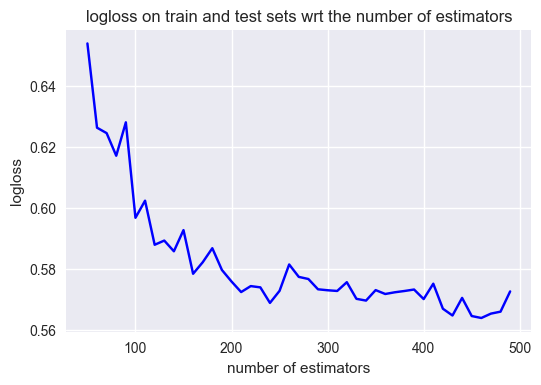

In [11]:
tps = clock()
max_est = 500
step = 10
scores = []

for nb_est in range(50,max_est,step):
    model = RandomForestClassifier(n_estimators=nb_est, criterion ='gini')
    model.fit(X_train,y_train)
    scores.append(log_loss(y_test,model.predict_proba(X_test)))

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(50,max_est,step),scores,c = 'b')
plt.title("logloss on train and test sets wrt the number of estimators")
plt.xlabel("number of estimators")
plt.ylabel("logloss")

## Learning curves

At most 49502 rows
100
1100
2100
3100
4100
5100
6100
7100
8100
9100
10100
11100
12100
13100
14100
15100
16100
17100
18100
19100
20100
21100
22100
23100
24100
25100
26100
27100
28100
29100
30100
31100
32100
33100
34100
35100
36100
37100
38100
39100
40100
41100
42100
43100
44100
45100
46100
47100
48100
49100
Execution time: 3228.205s


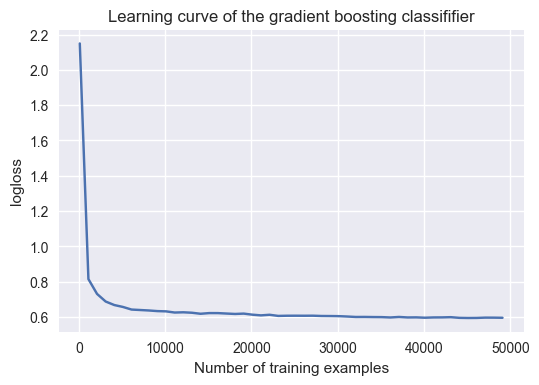

In [15]:
tps = clock()
scores = []
start,stop,step = 100,len(X_train),1000
print("At most %i rows" %len(X_train))

#best_gbc_clf = GradientBoostingClassifier(random_state = 42, learning_rate = 0.2, n_estimators = 600)
best_gbc_clf = GradientBoostingClassifier()
    
for nb_rows in range(start,stop,step):
    print(nb_rows)
    # On utilise ici un classifieur par gradientboosting avec les meilleurs HP trouvés
    best_gbc_clf.fit(X_train[:nb_rows], y_train[:nb_rows])
    scores.append(log_loss(y_test,best_gbc_clf.predict_proba(X_test),labels = [1,2,3,4,5,6,7,8,9]))
    
plt.plot(np.arange(start,stop,step),scores)
plt.title('Learning curve of the gradient boosting classififier')
plt.xlabel('Number of training examples')
plt.ylabel('logloss')
print("Execution time: %.3fs" %(clock()-tps))

At most 49502 rows
Execution time: 309.647s


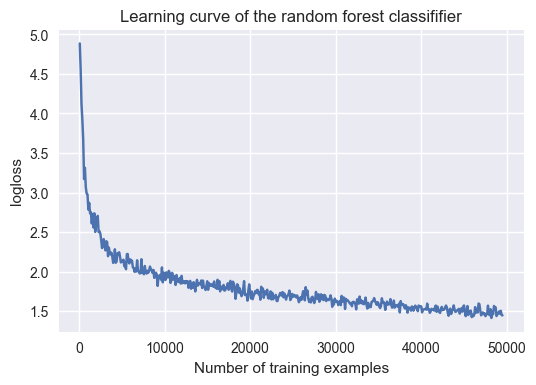

In [16]:
tps = clock()
scores = []
start,stop,step = 100,len(X_train),100
print("At most %i rows" %len(X_train))

best_rf_clf = RandomForestClassifier()

for nb_rows in range(start,stop,step):
    # On utilise ici un classifieur par random forest avec les meilleurs HP trouvés
    best_rf_clf.fit(X_train[:nb_rows], y_train[:nb_rows])
    scores.append(log_loss(y_test,best_rf_clf.predict_proba(X_test),labels = [1,2,3,4,5,6,7,8,9]))
    
plt.plot(np.arange(start,stop,step),scores)
plt.title('Learning curve of the random forest classififier')
plt.xlabel('Number of training examples')
plt.ylabel('logloss')
print("Execution time: %.3fs" %(clock()-tps))

## Feature construction

In [42]:
#With a normal RAM capacity, let's only take the top 10 xgboost features
cols = X.columns
X_new = X.copy()

#Select the features
feature_import = xgb.feature_importances_
FI = pd.DataFrame()
FI['Feature']= cols
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
features = FI.head(10).Feature.values

#Creste the new columns
for feat in features:
    for feat2 in features:
        X_new[feat + ' * ' + feat2] = (X_new[feat] * X_new[feat2])
        X_new[feat + ' max ' + feat2] = pd.concat([X_new[feat],X_new[feat2]],axis = 1).max(axis = 1)
        
X_train_new, X_test_new,_,_ = train_test_split(X_new,y, test_size = 0.2, random_state=42)

print("Before the feature construction: %i columns" %len(feature_import))
print("After it: %i columns" %X_new.shape[1])
X_new.head()

Before the feature construction: 93 columns
After it: 293 columns


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86 * feat_67,feat_86 max feat_67,feat_86 * feat_60,feat_86 max feat_60,feat_86 * feat_14,feat_86 max feat_14,feat_86 * feat_25,feat_86 max feat_25,feat_86 * feat_86,feat_86 max feat_86
0,1,0,0,0,0,0,0,0,0,0,...,0,7,0,11,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,6,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,5,5,0,1,0,1,2,2,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
start = clock()
#Random Forest
RF2 = RandomForestClassifier(n_estimators=150, criterion ='gini',random_state=42, n_jobs=-1)
RF2.fit(X_train_new,y_train)
y_probas = RF2.predict_proba(X_test_new)
print("Random Forest : %.4f" %log_loss(y_test,y_probas))

#Xgboost
xgb2 = XGBClassifier()
xgb2.fit(X_train_new,y_train)
y_probas = xgb2.predict_proba(X_test_new)
print("Xgboost : %.4f" %log_loss(y_test,y_probas))

#AdaBoost
ada2 = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state = 42)
ada2.fit(X_train_new,y_train)
y_probas = ada2.predict_proba(X_test_new)
print("Adaboost : %.4f" %log_loss(y_test,y_probas))

#MLPClassifier
mlp2 = MLPClassifier(random_state = 42)
mlp2.fit(X_train_new,y_train)
y_probas = mlp2.predict_proba(X_test_new)
print("Multi linear perceptron : %.4f" %log_loss(y_test,y_probas))

#LDA
lda2 = LDA()
lda2.fit(X_train_new,y_train)
y_probas = lda2.predict_proba(X_test_new)
print("Linear discriminant analysis : %.4f" %log_loss(y_test,y_probas))

#GaussianNB
naive2 = GaussianNB()
naive2.fit(X_train_new,y_train)
y_probas = naive2.predict_proba(X_test_new)
print("Gaussian naive bayes : %.4f" %log_loss(y_test,y_probas))

#Apparemment il produit des nan
#SGDClassifier
#sgd2 = SGDClassifier(loss = 'log')
#sgd2.fit(X_train_new,y_train)
#y_probas = sgd2.predict_proba(X_test_new)
#print("SVM with SGD : %.4f" %log_loss(y_test,y_probas))

#DecisionTree
tree2 = DecisionTreeClassifier()
tree2.fit(X_train_new,y_train)
y_probas = tree2.predict_proba(X_test_new)
print("Decision tree : %.4f" %log_loss(y_test,y_probas))

#GradientBoostingTree
boost2 = GradientBoostingClassifier(random_state = 42)
boost2.fit(X_train_new,y_train)
y_probas = boost2.predict_proba(X_test_new)
print("Gradient boosting : %.4f" %log_loss(y_test,y_probas))


print("Execution time: %.3fs" %(clock()-start))

Random Forest : 0.6548
Xgboost : 0.6290
Adaboost : 2.1223
Multi linear perceptron : 0.6200


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Linear discriminant analysis : 0.8861
Gaussian naive bayes : 13.5099
Decision tree : 9.9017
Gradient boosting : 0.5867
Execution time: 1195.352s


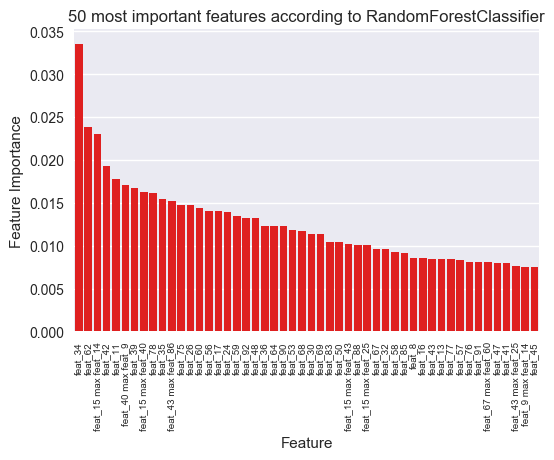

In [49]:
#analyzing feature importance
feature_import = xgb2.feature_importances_
FI = pd.DataFrame()
FI['Feature']= X_new.columns
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
ax = sns.barplot(FI['Feature'].iloc[:50], FI['Importance'].iloc[:50], color='r')
plt.title('50 most important features according to RandomForestClassifier')
plt.xlabel('Feature')
for item in ax.get_xticklabels():
    item.set_fontsize(7)
    
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

## Feature importance

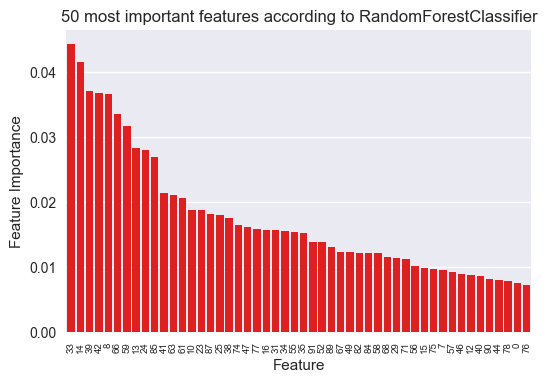

In [50]:
#analyzing feature importance
feature_import = xgb.feature_importances_
FI = pd.DataFrame()
FI['Feature']= np.arange(X.shape[1])
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
ax = sns.barplot(FI['Feature'].iloc[:50], FI['Importance'].iloc[:50], color='r', order = FI['Feature'].iloc[:50])
plt.title('50 most important features according to RandomForestClassifier')
plt.xlabel('Feature')
for item in ax.get_xticklabels():
    item.set_fontsize(7)
    
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

## Stacking

In [54]:
model_dict = {'Decision_tree':tree,
              'random_forest':RF,
              'xgboost':xgb,
              'gradient_boosting':boost,
              'adaboost':ada,
              'multi_linear_perceptron':mlp,
              'linear_discriminant_analysis':lda,
             'naive_bayes':naive,
             'sgd':sgd}
models = ['Decision_tree','random_forest','xgboost','gradient_boosting','adaboost','multi_linear_perceptron',
          'linear_discriminant_analysis','naive_bayes','sgd']

second_layer_tr = pd.DataFrame()
for model in models:
    preds = model_dict[model].predict_proba(X_train)
    for i in range(9):
        second_layer_tr[model+'_class_'+str(i+1)] = preds[:,i]

C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


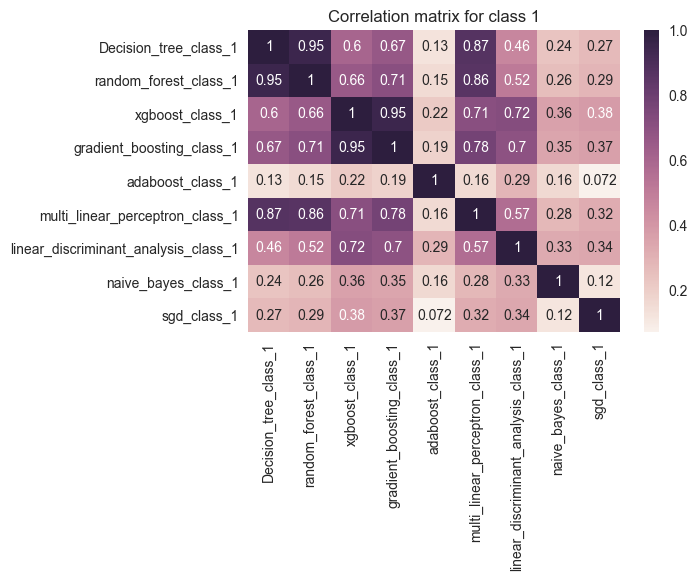

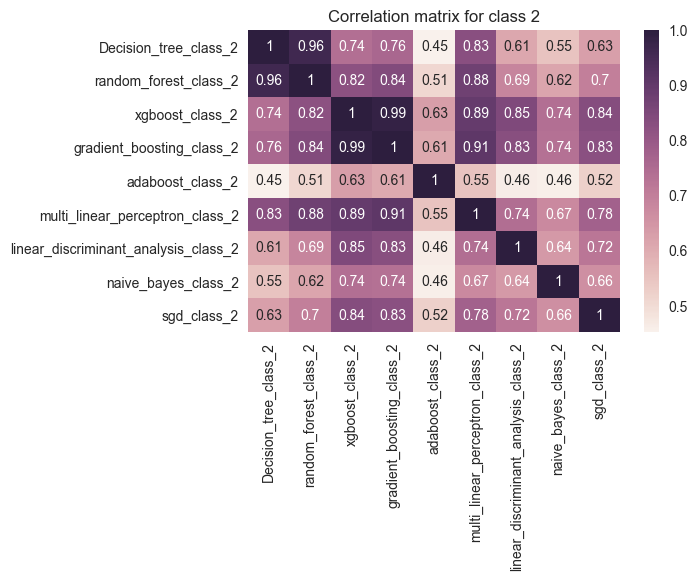

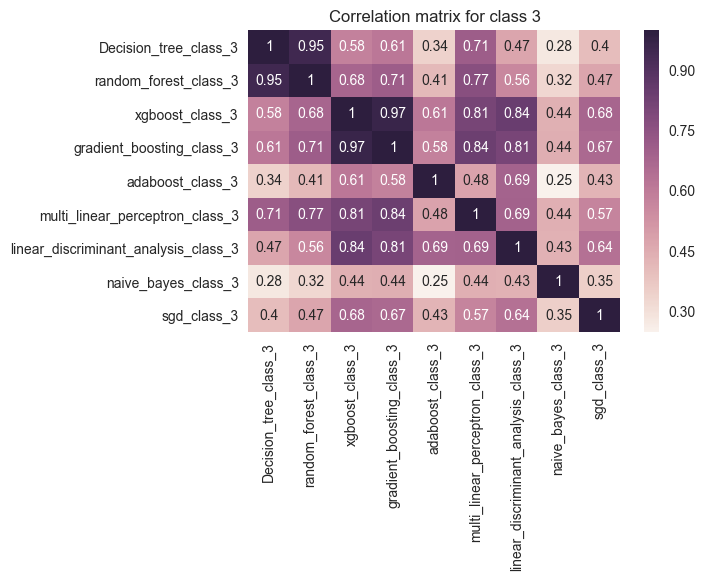

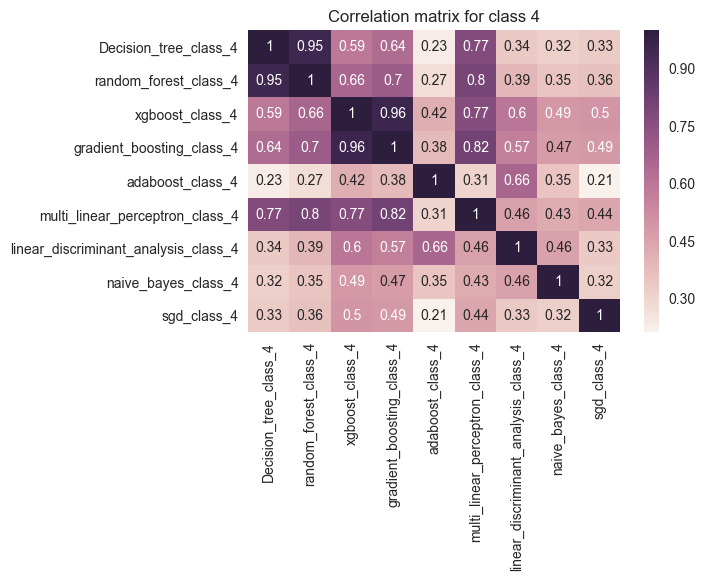

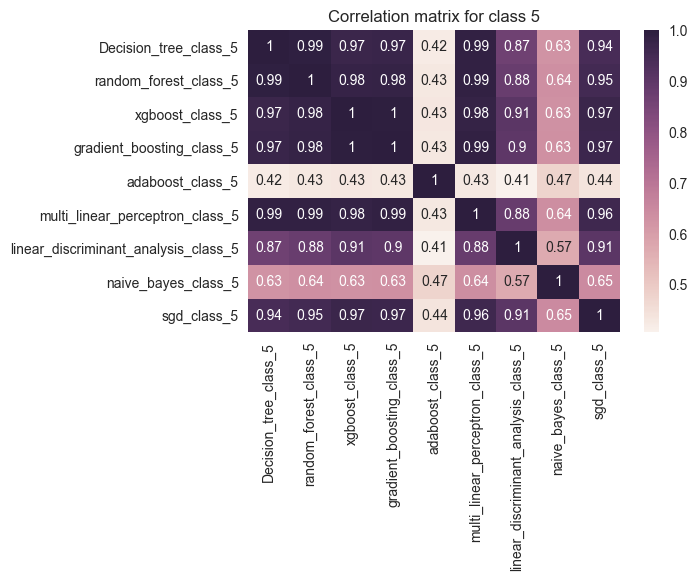

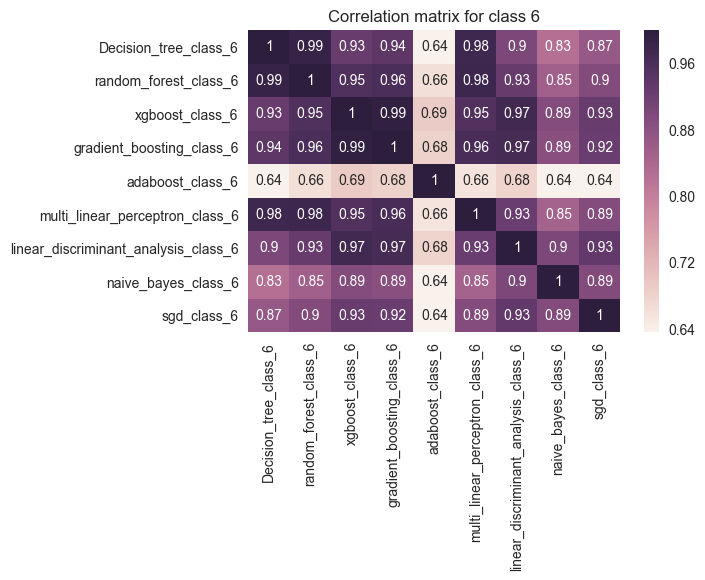

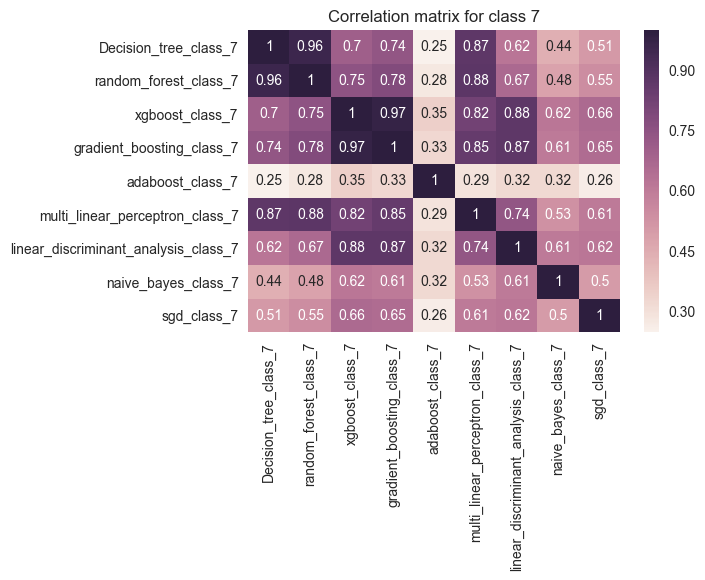

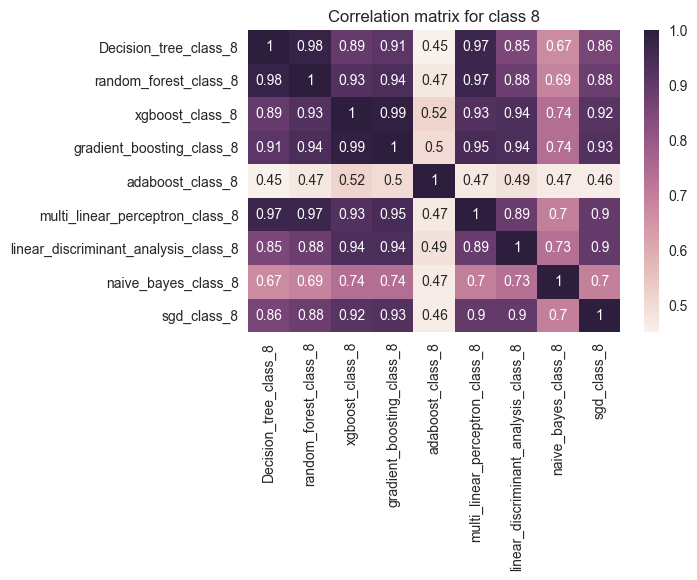

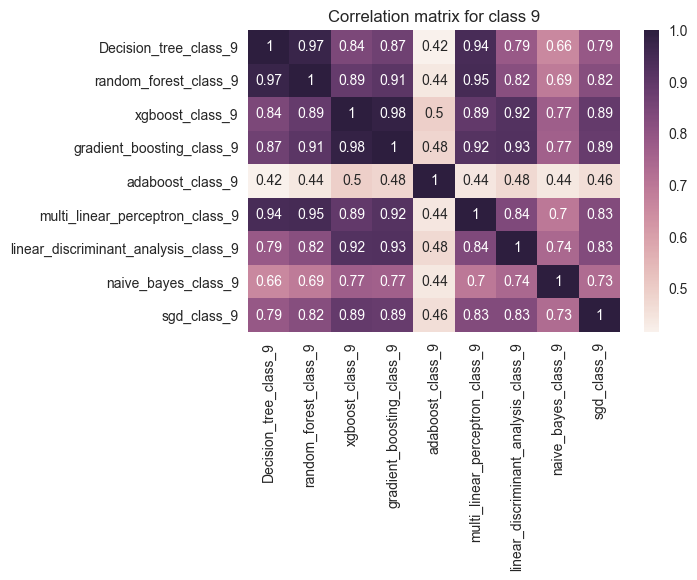

In [55]:
#Print of the correlation matrices for each class.
# Classes 5.6.8 and 9 get high correlation for everything but adaboost.
# Get a look at the confusions matrices
for target in range(9):
    temp = second_layer_tr[[model+'_class_'+str(target+1) for model in models]]
    plt.figure()
    sns.heatmap(temp.corr(),annot=True)
    plt.title('Correlation matrix for class '+str(target+1))
    plt.show()

In [58]:
stacking_model = GradientBoostingClassifier(random_state = 42, n_estimators = 300, learning_rate = 0.2)
stacking_model.fit(second_layer_tr,y_train)

second_layer_te = pd.DataFrame()
for model in models:
    preds = model_dict[model].predict_proba(X_test)
    for i in range(9):
        second_layer_te[model+'_class_'+str(i+1)] = preds[:,i]

y_probas = stacking_model.predict_proba(second_layer_te)
print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 2.6850


C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


#### 2/ Keeping the feature construction

In [57]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)